In [1]:
import numpy as np
import scipy.optimize as OPT
import matplotlib.pyplot as plt

In [2]:
def cox_loss(est_lam):
    li = 0
    lams = [est_lam[0]]*num_m + [est_lam[1]]*num_f
    fx_exp = np.exp(lams)
    for i in range(len(obs_flag)):
        if obs_flag[i] == True:
            tp_li = fx_exp[i] / fx_exp[survs>=survs[i]].sum()
            li += -np.log(tp_li)
    return li

In [3]:
def get_time(uni_ran, exp_w):
    return -np.log(1-uni_ran)/exp_w

In [4]:
lam_m= 3
c_m = 5

lam_f = 1
c_f = 1

num_m = 1000
num_f = 1000


for i in range(10):
    m_suv = get_time(np.random.uniform(size=num_m), np.exp([lam_m]*num_m))
    m_cen = np.random.exponential(scale=1/c_m, size=num_m)
    m_obs = (m_suv<=m_cen)
    m_suv[m_obs==False]=m_cen[m_obs==False]
    
    f_suv = get_time(np.random.uniform(size=num_f), np.exp([lam_f]*num_f))
    f_cen = np.random.exponential(scale=1/c_f, size=num_f)
    f_obs = (f_suv<=f_cen)
    f_suv[f_obs==False]=f_cen[f_obs==False]

    survs = np.concatenate((m_suv, f_suv), axis=0)
    obs_flag = np.concatenate((m_obs, f_obs), axis=0)
    bnds = ((0, 20),)*2
    res = OPT.minimize(cox_loss, [5, 5], method='Powell', bounds=bnds, tol=1e-3)
    print(res.x)
    print(res.x[0] - res.x[1])
    print()

[6.96292493 4.99995957]
1.9629653607737056

[6.94477773 4.99997733]
1.9448003974843306

[6.99086517 4.99996271]
1.9909024627267273

[7.0522675  5.00005004]
2.0522174571316976

[6.99512122 4.99997625]
1.9951449676436965

[7.02162887 5.00003243]
2.0215964421425223

[6.99821116 4.99999111]
1.998220051384183

[6.94581073 5.00000979]
1.9458009431798073

[7.04429053 4.99997077]
2.0443197634595505

[6.9781776  4.99996356]
1.9782140407344757



In [9]:
def L_loss(est_lam): #likelihood
    lams = [est_lam[0]]*num_m + [est_lam[1]]*num_f
    fx_exp = np.exp(lams)
    ob_part = (np.log(fx_exp)+(-survs*fx_exp))*obs_flag
    un_part = -survs*fx_exp*(1-obs_flag)
    return -(ob_part.sum()+un_part.sum())

In [23]:
lam_m= 3
c_m = 3

lam_f = 1
c_f = 1

num_m = 1000
num_f = 1000

for i in range(10):
    m_suv = get_time(np.random.uniform(size=num_m), np.exp([lam_m]*num_m))
    m_cen = np.random.exponential(scale=1/c_m, size=num_m)
    m_obs = (m_suv<=m_cen)
    m_suv[m_obs==False]=m_cen[m_obs==False]
    
    f_suv = get_time(np.random.uniform(size=num_f), np.exp([lam_f]*num_f))
    f_cen = np.random.exponential(scale=1/c_f, size=num_f)
    f_obs = (f_suv<=f_cen)
    f_suv[f_obs==False]=f_cen[f_obs==False]

    survs = np.concatenate((m_suv, f_suv), axis=0)
    obs_flag = np.concatenate((m_obs, f_obs), axis=0)
    bnds = ((0, 20),)*2
    res = OPT.minimize(L_loss, [5, 5], method='Powell', bounds=bnds, tol=1e-7)
    print(res.x)
    print(res.x[0] - res.x[1])
    print()

[2.97294352 0.9932554 ]
1.9796881179669392

[3.04678199 1.03133946]
2.0154425339984003

[2.95147597 1.01041342]
1.9410625554536534

[3.04088428 1.0013669 ]
2.0395173817182437

[2.98794738 1.00060398]
1.9873433947729926

[2.99941392 1.00247155]
1.9969423687640897

[3.06222725 0.98186119]
2.080366063933166

[2.97762851 1.01984308]
1.9577854317664891

[3.02639636 0.95978425]
2.066612111363293

[2.97691197 1.01498891]
1.9619230582094387



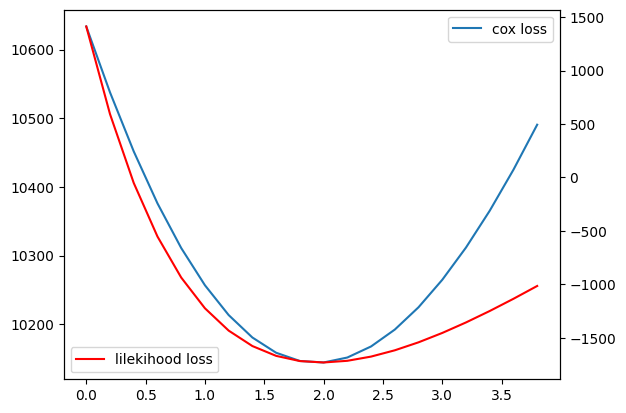

In [47]:
# comparison of the two losses
diff = np.array([i/5 for i in range(0,20)])
x=3
# plt.plot(diff, [cox_loss((x,x-d)) for d in diff])
# plt.plot(diff, [L_loss((x,x-d)) for d in diff])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(diff, [cox_loss((x,x-d)) for d in diff], '-', label = 'cox loss')
ax2 = ax.twinx()
ax2.plot(diff, [L_loss((x,x-d)) for d in diff], '-r', label = 'lilekihood loss')
ax.legend(loc=0)
ax2.legend(loc=3)
plt.show()